# Lab 4 - Support Vector Machines and Neural Networks
In this lab we look at utilizing Support Vector Machines and Neural Networks. We present some worked examples showing the application of both SVMs and Neural Networks, and your tasks are to implement the methods on the Fisher Iris dataset.

For Support Vector Machines we will be looking at both the binary and multiclass classification problems using the SVM classifier. We will also visualise the decision boundary in the 2D case.

For Neural Networks we will be building a simple architecture using the tensorflow.keras API, with a variety of different layers within our network which you can explore and tune. 


<b>Important note:</b>

Unlike the previous labs, you will not be completing TODOs in skeleton code. We will instead focus on utilising the existing implementations of these algorithms over implementing our own. These two techniques are some of the more complex algorithms to implement from scratch, so we will use sklearn's svm.SVC and Tensorflow's Keras implementations to solve the presented problems. In this labsheet you should run the notebook and understand the different components of what is happening. You are then going to implement both a multiclass SVM and a neural network for the purpose of multiclass classification on the Fisher Iris dataset. 

There are <b>two</b> marked tasks at the end to complete. 

# Support Vector Machines for Binary Classification

Here we utilise SVMs for the classification problem on a 2-dimensional binary labelled version of the Fisher Iris problem. In this case we will use scikit-learn's built in SVM functionality contained in sklearn.svm and the <i>SVC</i> object. SVC here stands for a Support Vector Classifier, and despite the name difference they implement the same algorithm. 

Our tasks are:

<ul>
    <li>Load the data and labels.</li>
    <li>Convert the labels into a binary classification problem.</li>
    <li>Split the data into a training and testing set.</li>
    <li>Create an instance of the sklearn.svm.SVC object with a linear kernel.</li>
    <li>Fit the model to the training data given the binary training labels.</li>
    <li>Predict the class of the testing set observations.</li>
    <li>Report the percentage accuracy of the model on the testing set.</li>
    <li>Plot the decision boundary and margin to identify the support vectors.</li>
</ul>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

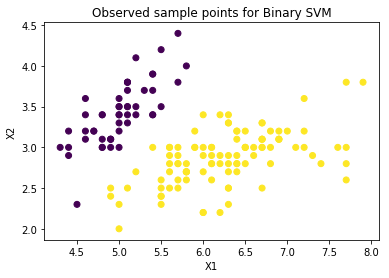

In [18]:
# Load the original Iris data and labels 
x = np.load('Iris_data.npy')
y = np.load('Iris_labels.npy')

# Create a binary class problem.
positive_class = 0 # This means we are interested in classifying class 0 vs. all other classes. Try changing this to another class if you want.
temp_class = np.max(y) + 1
y[y != positive_class] = temp_class
y[y != temp_class] = 0
y[y == temp_class] = 1

# Create a 2D dataset. This is just to aide in visualisation steps later on.
# Try changing the data to explore more complex domains.
x = x[:, 0:2]

# Plot the data, colouring the samples by their binary label.
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Observed sample points for Binary SVM')
plt.show(block=False)

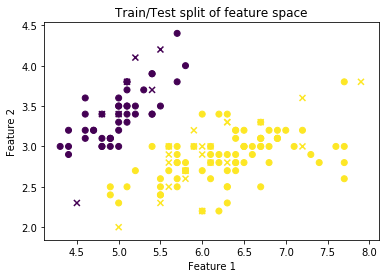

In [19]:
# Split the dataset into a training and testing set.

# Select data points to divide into a training and testing set.
test_train_ratio = 0.2
testing_indices = np.random.choice(np.arange(x.shape[0]), int(x.shape[0] * test_train_ratio), replace=False)
training_indices = np.delete(np.arange(x.shape[0]), testing_indices)

# Divide the dataset into the two sets.
test_data = x[testing_indices, :] 
test_labels = y[testing_indices] 
train_data = x[training_indices, :] 
train_labels = y[training_indices] 

# Plot the training samples, then plot the testing samples with different marker shapes.
plt.scatter(train_data[:, 0], train_data[:, 1], marker='o', c=train_labels)
plt.scatter(test_data[:, 0], test_data[:, 1], marker='x', c=test_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Train/Test split of feature space')
plt.show()

In [20]:
# Create an instance of the svm.SVC model with appropriate hyperparameters.

C = 1 # This is the penalty of the error term (Lecture 8, slide 18). 
kernel_type = 'linear' # This denotes the type of kernel used by our SVM (Lecture 8, slides 15/16)
model = SVC(kernel=kernel_type, C=C)

# Fit the model to the dataset, given the binary labels.
model.fit(train_data, train_labels)

# Use the model to predict the class of the test observations.
y_pred = model.predict(test_data)

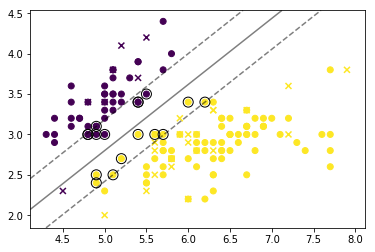

In [21]:
# Visualise the model's decision boundary and supporting vectors.

# Plot the training and testing data.
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, marker='o')
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, marker='x')

# Get axis limits and create a grid to evaluate the model upon.
ax = plt.gca()
xlimits = ax.get_xlim()
ylimits = ax.get_ylim()

xx = np.linspace(xlimits[0], xlimits[1], 90)
yy = np.linspace(ylimits[0], ylimits[1], 90)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins.
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight the support vectors.
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

In [22]:
# Calculate the percentage accuracy rate on test set
accuracy = np.sum(np.equal(test_labels, y_pred)) / test_labels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 96.67%


### Notice:

This example is a nice linearly seperable case and we can divide the two classes quite easily with a linear decision boundary. In the real world we may not have such a luxury, and we may want to use a different kernel instead of linear. For example; try changing the kernel above to a radial basis function by using <i>kernel='rbf'</i>, notice the difference in the decision boundary and the supporting vectors.

Notice also the penalty term <i>C</i>. Try raising or lowering this value, what effect does it have on the boundary and the margins produced?

# Support Vector Machines for Multiclass Classification

In this section we use svm.SVC in a multiclass approach, where we want to classify the original Fisher Iris data. This code is almost exactly the same as that above, however we retain the multiple classes in the labels and plot the decision boundaries for each class. 

Our tasks are:

<ul>
    <li>Load the data and labels.</li>
    <li>Split the data into a training and testing set.</li>
    <li>Create an instance of the sklearn.svm.SVC object with a linear kernel.</li>
    <li>Fit the model to the training data given the training labels.</li>
    <li>Predict the class of the testing set observations.</li>
    <li>Report the percentage accuracy of the model on the testing set.</li>
    <li>Plot the decision boundary and margin to identify the support vectors.</li>
</ul>

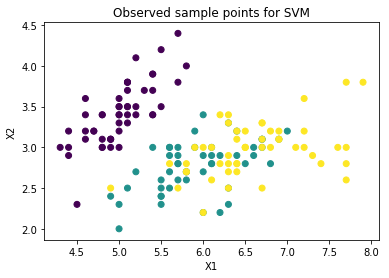

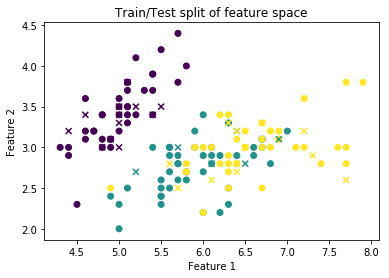

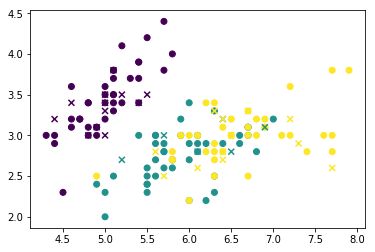

Percentage accuracy on testing set is: 76.67%


In [23]:
# Load the original Iris data and labels 
x = np.load('Iris_data.npy')
y = np.load('Iris_labels.npy')

# Create a 2D dataset. This is just to aide in visualisation steps later on.
# Try changing the data to explore more complex problems.
x = x[:, 0:2]

# Plot the data, colouring the samples by their binary label.
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Observed sample points for SVM')
plt.show(block=False)

# Split the dataset into a training and testing set.

# Select data points to divide into a training and testing set.
test_train_ratio = 0.2
testing_indices = np.random.choice(np.arange(x.shape[0]), int(x.shape[0] * test_train_ratio), replace=False)
training_indices = np.delete(np.arange(x.shape[0]), testing_indices)

# Divide the dataset into the two sets.
test_data = x[testing_indices, :] 
test_labels = y[testing_indices] 
train_data = x[training_indices, :] 
train_labels = y[training_indices] 

# Plot the training samples, then plot the testing samples with different marker shapes.
plt.scatter(train_data[:, 0], train_data[:, 1], marker='o', c=train_labels)
plt.scatter(test_data[:, 0], test_data[:, 1], marker='x', c=test_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Train/Test split of feature space')
plt.show()

# Create an instance of the svm.SVC model with appropriate hyperparameters.
C = 1 # This is the penalty of the error term (Lecture 8, slide 18). 
model = SVC(kernel='linear', C=C)

# Fit the model to the dataset, given the binary labels.
model.fit(train_data, train_labels)

# Use the model to predict the class of the test observations.
y_pred = model.predict(test_data)

# Plot the training and testing data.
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, marker='o')
plt.scatter(test_data[:, 0],test_data[:, 1], c=test_labels, marker='x')

# Plot decision boundaries for each class
Z = model.predict(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, alpha=0.5)

plt.show()

# Calculate the percentage accuracy rate on test set
accuracy = np.sum(np.equal(test_labels, y_pred)) / test_labels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

# Neural Networks
In this section we use tensorflow.keras in a multiclass approach on the original Fisher Iris data. We will again load in the data and generate a training and testing set. We will then define a neural network architecture for the classification problem.

Keras has a lot of subsequent modules, including <i>layers</i> and <i>models</i> which contain their own functionality. We will use keras.layers to construct our architecture, and we will then bake this into a callable Model object from keras.models.

Our tasks are:

<ul>
    <li>Load the data and labels.</li>
    <li>Split the data into a training and testing set.</li>
    <li>Create a keras network architecture with a number of hidden layers.</li>
    <li>Bake the architecture into a model.</li>
    <li>Fit the model to the training data.</li>
    <li>Predict the class of the testing set observations.</li>
    <li>Report the percentage accuracy of the model on the testing set.</li>
</ul>

In [24]:
import tensorflow.keras as keras

In [25]:
# Load the original Iris data and labels 
x = np.load('Iris_data.npy')
y = np.load('Iris_labels.npy')

In [26]:
# Load data and create train/test split. Exactly as before.

# Find out the number of classes in the dataset
number_of_classes = np.max(y) + 1

# Convert the labels to a one hot encoding
y =  np.eye(number_of_classes)[y]

# Create a 2D dataset. This is just to aide in visualisation steps later on.
# Try changing the data to explore more complex problems.
x = x[:, 0:2]

# Select data points to divide into a training and testing set.
test_train_ratio = 0.2
testing_indices = np.random.choice(np.arange(x.shape[0]), int(x.shape[0] * test_train_ratio), replace=False)
training_indices = np.delete(np.arange(x.shape[0]), testing_indices)

# Divide the dataset into the two sets.
test_data = x[testing_indices, :] 
test_labels = y[testing_indices, :] 
train_data = x[training_indices, :] 
train_labels = y[training_indices, :] 

In [35]:
# Build our network architecture by stacking layers, passing the outputs from one layer into the next.

# Create the input layer, this takes an argument of the input data shape (i.e. number of features)
input_layer = keras.layers.Input(shape=(train_data.shape[1],))

# Create hidden layer with 10 neurons. The input to the layer is 'input_layer'.
hidden = keras.layers.Dense(10)(input_layer)

# Create hidden layer with 20 neurons. The input is 'hidden', the output from previous layer.
hidden = keras.layers.Dense(20)(hidden)

# Create output softmax layer to get predicted class labels.
output_layer = keras.layers.Dense(number_of_classes, activation='softmax')(hidden)

4


In [28]:
# Generate a callable keras Model object which contains our architecture.
# This allows us to train and predict our neural network on the datasets.

# Bake our architecture into a keras Model object
model = keras.models.Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='sgd', loss='categorical_crossentropy')

# Fit our model to the data
model.fit(train_data, train_labels, epochs=50)

# Predicted probabilities of classes for the testing set.
predictions = model.predict(test_data)

# Use argmax to get the predicted class label
y_pred = np.argmax(predictions, axis=1)

# Calculate the percentage accuracy rate on test set
accuracy = np.sum(np.equal(np.argmax(test_labels, axis=1), y_pred)) / test_labels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Epoch 1/50
120/120 [==============================] - 0s 2ms/step - loss: 2.3598
Epoch 2/50
120/120 [==============================] - 0s 103us/step - loss: 1.1601
Epoch 3/50
120/120 [==============================] - 0s 95us/step - loss: 1.0489
Epoch 4/50
120/120 [==============================] - 0s 93us/step - loss: 1.0392
Epoch 5/50
120/120 [==============================] - 0s 99us/step - loss: 1.0170
Epoch 6/50
120/120 [==============================] - 0s 102us/step - loss: 0.9848
Epoch 7/50
120/120 [==============================] - 0s 108us/step - loss: 0.9861
Epoch 8/50
120/120 [==============================] - 0s 113us/step - loss: 0.9580
Epoch 9/50
120/120 [==============================] - 0s 113us/step - loss: 0.9402
Epoch 10/50
120/120 [==============================] - 0s 154us/step - loss: 0.9063
Epoch 11/50
120/120 [==============================] - 0s 111us/step - loss: 0.8970
Epoch 12/50
120/120 [==============================] - 0s 158us/step - loss: 0.9496
Epoch 

# Marked Tasks
## Task 4.1
Load the full Fisher Iris dataset and divide the data into training and testing splits. Use all 4 dimensions of the data.

Train a multiclass SVM on the training set and use the model to predict the class labels of the testing set. Print the percentage accuracy of your model.

## Task 4.2
Using the same dataset split as above, train a neural network on the testing set and predict the class labels on the testing set. Again, print the percentage accuracy of your model. Define an architecture of your choosing, with a different number of hidden layers with a different number of neurons in each layer. Try and find a good network architecture. 

In [34]:
# Load the original Iris data and labels 
x = np.load('Iris_data.npy')
y = np.load('Iris_labels.npy')

# Find out the number of classes in the dataset
number_of_classes = np.max(y) + 1

# Convert the labels to a one hot encoding
y = np.eye(number_of_classes)[y]

# Select data points to divide into a training and testing set.
test_train_ratio = 0.2
testing_indices = np.random.choice(np.arange(x.shape[0]), int(x.shape[0] * test_train_ratio), replace=False)
training_indices = np.delete(np.arange(x.shape[0]), testing_indices)
# Divide the dataset into the two sets.
test_data = x[testing_indices, :] 
test_labels = y[testing_indices, :] 
train_data = x[training_indices, :] 
train_labels = y[training_indices, :] 

# Create SVM
C = 10
model = SVC(kernel='linear', C=C)

# Fit the model to the dataset, given the binary labels.
model.fit(train_data, np.argmax(train_labels, axis = 1))

#print(test_data)

# Use the model to predict the class of the test observations.
y_pred = model.predict(test_data)

# Calculate the percentage accuracy rate on test set
accuracy = np.sum(np.equal(np.argmax(test_labels, axis = 1), y_pred)) / test_labels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 96.67%


In [36]:
# Build our network architecture by stacking layers, passing the outputs from one layer into the next.

# Create the input layer, this takes an argument of the input data shape (i.e. number of features)
input_layer = keras.layers.Input(shape=(train_data.shape[1],))

# Create hidden layer with 5 neurons. The input to the layer is 'input_layer'.
hidden = keras.layers.Dense(5)(input_layer)

# Create output softmax layer to get predicted class labels.
output_layer = keras.layers.Dense(number_of_classes, activation='softmax')(hidden)

4


In [31]:
# Generate a callable keras Model object which contains our architecture.
# This allows us to train and predict our neural network on the datasets.

# Bake our architecture into a keras Model object
model = keras.models.Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='sgd', loss='categorical_crossentropy')

# Fit our model to the data
model.fit(train_data, train_labels, epochs=50)

# Predicted probabilities of classes for the testing set.
predictions = model.predict(test_data)

# Use argmax to get the predicted class label
y_pred = np.argmax(predictions, axis=1)

# Calculate the percentage accuracy rate on test set
accuracy = np.sum(np.equal(np.argmax(test_labels, axis=1), y_pred)) / test_labels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Epoch 1/50
120/120 [==============================] - 0s 3ms/step - loss: 4.3242
Epoch 2/50
120/120 [==============================] - 0s 134us/step - loss: 2.0214
Epoch 3/50
120/120 [==============================] - 0s 142us/step - loss: 1.0085
Epoch 4/50
120/120 [==============================] - 0s 120us/step - loss: 0.6608
Epoch 5/50
120/120 [==============================] - 0s 136us/step - loss: 0.6263
Epoch 6/50
120/120 [==============================] - 0s 130us/step - loss: 0.5982
Epoch 7/50
120/120 [==============================] - 0s 127us/step - loss: 0.5931
Epoch 8/50
120/120 [==============================] - 0s 134us/step - loss: 0.5786
Epoch 9/50
120/120 [==============================] - 0s 96us/step - loss: 0.5802
Epoch 10/50
120/120 [==============================] - 0s 99us/step - loss: 0.5592
Epoch 11/50
120/120 [==============================] - 0s 85us/step - loss: 0.5511
Epoch 12/50
120/120 [==============================] - 0s 86us/step - loss: 0.5455
Epoch 1